# Методы обучения без учителя.

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [209]:
iris = load_iris()
D1 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#D1['target'] = pd.Series(iris.target)
D1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [210]:
D1['target'] = pd.Series(iris.target)
D1['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [211]:
D1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [212]:
pca = PCA(n_components=2)
pca.fit(D1)
D2 = pca.transform(D1)
#D2 = pd.DataFrame(data = df_pca)
D2

array([[-2.86541481e+00,  2.96294592e-01],
       [-2.89204667e+00, -1.83785089e-01],
       [-3.05498018e+00, -1.74826556e-01],
       [-2.92022951e+00, -3.31581792e-01],
       [-2.90685193e+00,  2.95916920e-01],
       [-2.48985229e+00,  7.33821200e-01],
       [-2.99073479e+00, -1.23337756e-01],
       [-2.81072341e+00,  1.49253233e-01],
       [-3.05102452e+00, -5.96522880e-01],
       [-2.85367989e+00, -1.18129504e-01],
       [-2.70121731e+00,  6.30088258e-01],
       [-2.79746912e+00,  1.83420106e-03],
       [-2.95910703e+00, -2.45743109e-01],
       [-3.36629732e+00, -5.60864364e-01],
       [-2.83188903e+00,  1.14006491e+00],
       [-2.58993648e+00,  1.30218121e+00],
       [-2.81008938e+00,  7.72676709e-01],
       [-2.83175695e+00,  2.89400035e-01],
       [-2.41526804e+00,  8.78798583e-01],
       [-2.77580155e+00,  4.85110874e-01],
       [-2.51699488e+00,  4.05235787e-01],
       [-2.73410906e+00,  4.09741412e-01],
       [-3.36069900e+00,  5.93621201e-02],
       [-2.

In [213]:
#D3 = pd.DataFrame(data =TSNE(n_components=2, learning_rate='auto',
D3 = data =TSNE(n_components=2, learning_rate='auto',
           init='random', perplexity=3).fit_transform(D1)
D3

array([[ 2.41735382e+01,  1.99568272e+01],
       [ 3.60507355e+01, -3.00386691e+00],
       [ 4.58275871e+01,  5.28432560e+00],
       [ 4.35983620e+01,  4.94822645e+00],
       [ 2.13924198e+01,  1.81471291e+01],
       [ 2.53482723e+01,  3.68284950e+01],
       [ 4.57036362e+01,  7.54138279e+00],
       [ 2.90785503e+01,  1.72278557e+01],
       [ 5.32561226e+01,  2.11012149e+00],
       [ 3.70686493e+01, -7.32316896e-02],
       [ 2.52872486e+01,  3.23195992e+01],
       [ 3.77366295e+01,  6.68658733e+00],
       [ 3.51833992e+01, -2.26610637e+00],
       [ 5.16931915e+01,  4.30616289e-01],
       [ 2.01014233e+01,  4.33626175e+01],
       [ 1.77900314e+01,  4.33070297e+01],
       [ 2.34060497e+01,  3.25742722e+01],
       [ 2.34565964e+01,  2.03219204e+01],
       [ 2.61433029e+01,  3.67898140e+01],
       [ 1.87211895e+01,  3.62742233e+01],
       [ 2.85884399e+01,  2.47171421e+01],
       [ 1.81086121e+01,  3.54853134e+01],
       [ 4.62806778e+01,  9.02837849e+00],
       [ 2.

In [214]:
from itertools import cycle, islice
def visualize_clusters(cluster_datasets, cluster_results):
    """
    Визуализация результатов кластерного анализа
    """
    plt.subplots(figsize=(10,7))
    plot_num = 0
    for X, y_pred in zip(cluster_datasets, cluster_results):
        plot_num += 1
        plt.subplot(2, 3, plot_num)
        # Цвета точек как результат кластеризации
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # черный цвет для выделяющихся значений
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=3, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
       # plt.title(datasets_names[plot_num-1])
    
    plt.show()

In [215]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def run_plot(D):
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = D[:, 0], D[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    ax.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()


In [216]:
df = pd.DataFrame(D2)
df

,0,1
0,-2.865415,0.296295
1,-2.892047,-0.183785
2,-3.054980,-0.174827
3,-2.920230,-0.331582
4,-2.906852,0.295917
...,...,...
145,2.173075,0.127588
146,1.784888,-0.443191
147,2.005296,0.010566
148,2.134042,0.037797


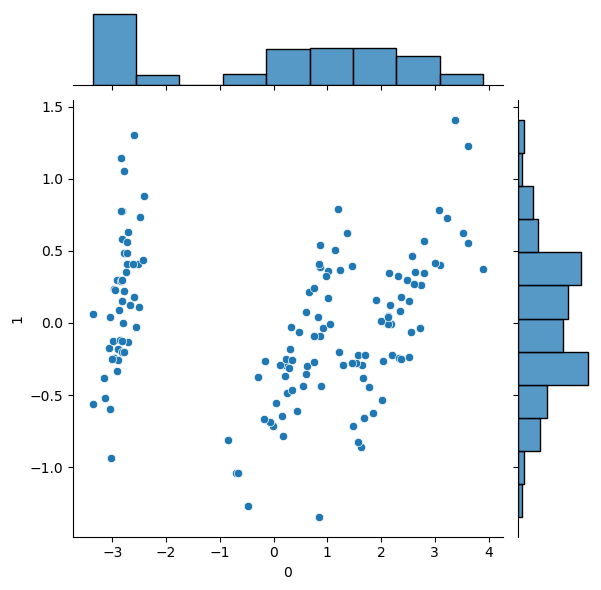

In [217]:
sns.jointplot(x=df[0], y=df[1], data=df)

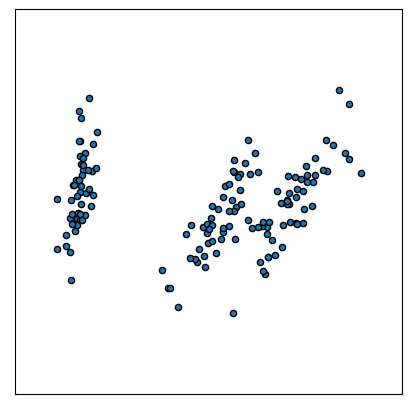

In [218]:
run_plot(D2)

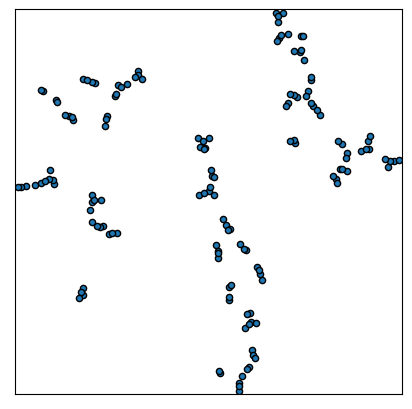

In [219]:
run_plot(D3)

In [220]:
from sklearn.cluster import KMeans, MiniBatchKMeans

In [221]:
def do_clustering(cluster_dataset, method):
    """
    Выполнение кластеризации для данных примера
    """
    cluster_results = []
    temp_cluster = method.fit_predict(cluster_dataset)
    cluster_results.append(temp_cluster)
    return cluster_results


In [222]:
D2 = pd.DataFrame(data = D2)

Wall time: 40 ms


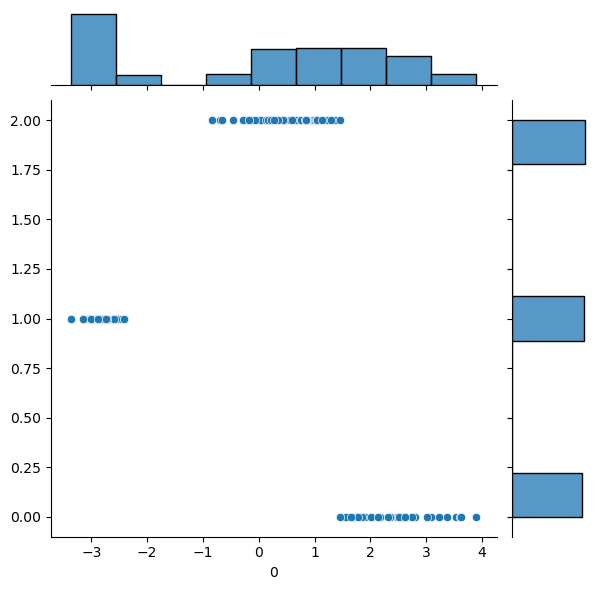

In [223]:
%time result_KMeans_3 = do_clustering(D1, KMeans(n_clusters=3))
sns.jointplot(x=D2[0], y=np.array(result_KMeans_3)[0], data=df)

Wall time: 44.6 ms


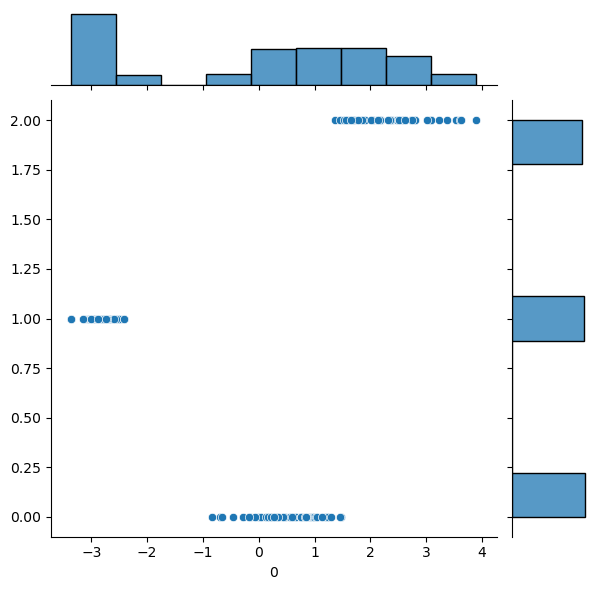

In [224]:
%time result_KMeans_5 = do_clustering(D2, KMeans(n_clusters=3))
sns.jointplot(x=D2[0], y=np.array(result_KMeans_5)[0], data=df)

Wall time: 44.2 ms


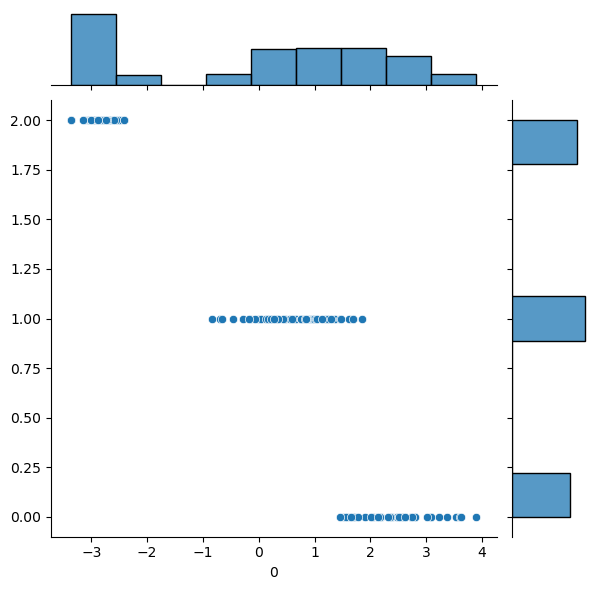

In [225]:
%time result_KMeans_5 = do_clustering(D3, KMeans(n_clusters=3))
sns.jointplot(x=D2[0], y=np.array(result_KMeans_5)[0], data=df)

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


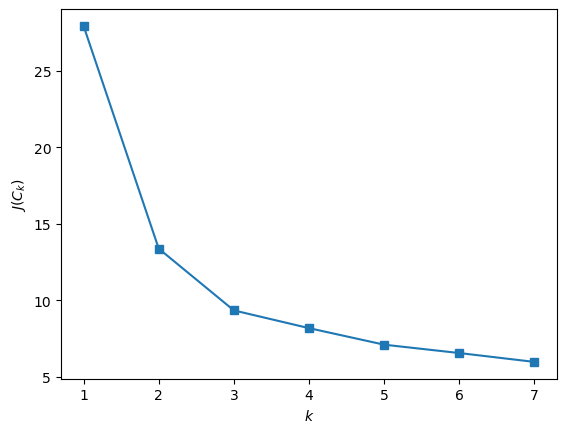

In [226]:
inertia = []
TEMP_X = D1
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(TEMP_X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


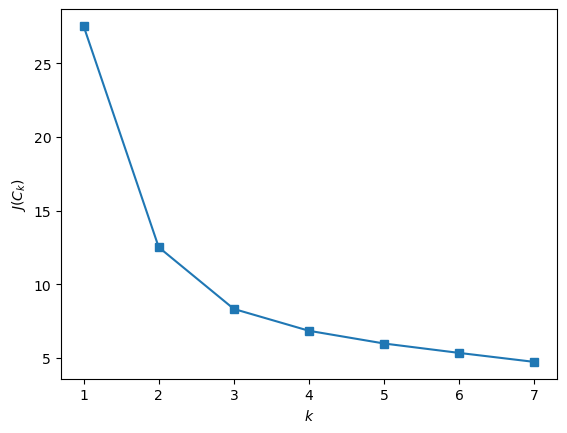

In [227]:
inertia = []
TEMP_X = D2
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(TEMP_X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


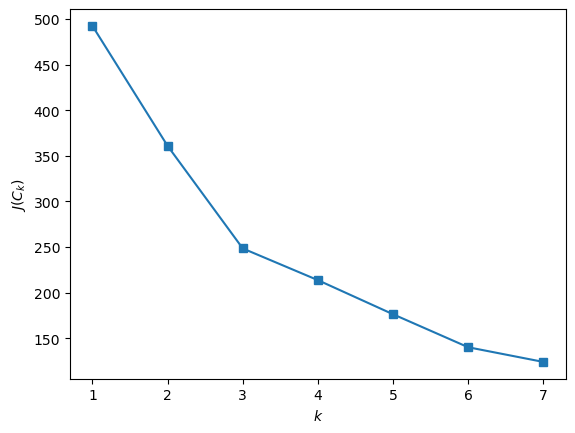

In [228]:
inertia = []
TEMP_X = D3
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(TEMP_X)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Коэффициент силуэта
Для вычисления метрики используется функция silhouette_score

Данный метод не требует знания истинных значений меток кластеров.

In [231]:
from sklearn.metrics import silhouette_score
def claster_metrics(method, cluster_datasets):
    """
    Вычисление метрик кластеризации
    """
   
    sl = []
    
    for X in cluster_datasets:
        temp_cluster = method.fit_predict(X)
        try:
            sscore = silhouette_score(X, temp_cluster)
        except:
            sscore = None
            
        sl.append(sscore)
    
    result = pd.DataFrame({'Silhouette':sl})
    return result

In [232]:
claster_metrics(KMeans(n_clusters=3), [D1, D2, D3])

,Silhouette
0,0.581897
1,0.608727
2,0.547409


In [238]:
from sklearn.cluster import DBSCAN
%time result_DBSCAN = do_clustering(D1, DBSCAN(eps=0.25))
claster_metrics(DBSCAN(eps=0.25), [D1, D2, D3])


Wall time: 8 ms


,Silhouette
0,-0.045802
1,0.408502
2,NaN


In [242]:
from sklearn.cluster import Birch
%time result_Birch = do_clustering(D1, Birch())
claster_metrics(Birch(), [D1, D2, D3])

Wall time: 11 ms


,Silhouette
0,0.511152
1,0.608227
2,0.541456


In [243]:
from sklearn.mixture import GaussianMixture
%time result_GaussianMixture = do_clustering(D1, GaussianMixture(n_components=3))
claster_metrics(GaussianMixture(n_components=3), [D1, D2, D3])

Wall time: 20 ms


,Silhouette
0,0.578216
1,0.598348
2,0.545824
